<a href="https://colab.research.google.com/github/VMohanraj27/ScofieldReese/blob/main/Breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
from keras.preprocessing.image import ImageDataGenerator

In [74]:
train_datagen = ImageDataGenerator(rescale=1/255,
                                   horizontal_flip=True,
                                   height_shift_range=0.3,
                                   width_shift_range=0.3,
                                   shear_range=0.2)

In [75]:
train_generator = train_datagen.flow_from_directory("/content/drive/MyDrive/Breast Cancer Patients MRI's/train",
                                                    target_size=(32,32),
                                                    class_mode='binary',
                                                    batch_size=32)

Found 1078 images belonging to 2 classes.


In [76]:
valid_datagen = ImageDataGenerator(rescale=1/255)

In [77]:
valid_generator = valid_datagen.flow_from_directory("/content/drive/MyDrive/Breast Cancer Patients MRI's/validation",
                                                    target_size=(32,32),
                                                    class_mode='binary',
                                                    batch_size=32)

Found 402 images belonging to 2 classes.


In [78]:
imgs,labels = next(train_generator)
num_classes = len(train_generator.class_indices)

In [79]:
def plot_images(images_arr):
  fig,axes = plt.subplots(1,12,figsize=(32,32))
  for img,ax in zip(images_arr,axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

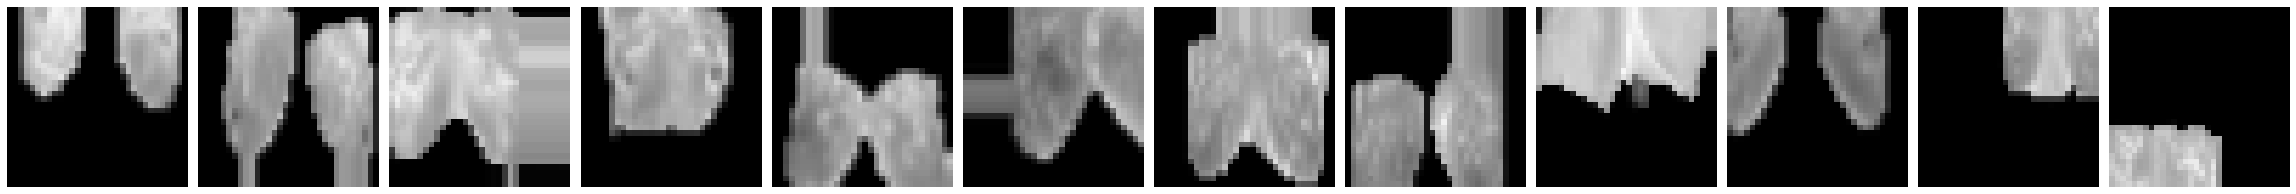

[0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0.
 1. 0. 0. 0. 1. 1. 1. 1.]


In [80]:
plot_images(imgs)
print(labels)

In [81]:
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.models import Sequential

In [103]:
model = Sequential()

In [104]:
model.add(Conv2D(filters=32, kernel_size=3,  activation='relu', input_shape=[32,32,3]))
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(BatchNormalization())

In [105]:
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(BatchNormalization())

In [106]:
model.add(Flatten())

In [112]:
model.add(Dense(units=1024, activation='relu'))
model.add(Dense(units=1024, activation='relu'))
model.add(Dense(units=1024, activation='relu'))
model.add(Dense(units=1024, activation='relu'))
model.add(Dense(units=1024, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [113]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['Accuracy'])

In [114]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_15 (Bat  (None, 15, 15, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_19 (Conv2D)          (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 6, 6, 32)         0         
 g2D)                                                            
                                                      

In [117]:
history = model.fit(x=train_generator, 
          batch_size=32, 
          epochs=10, 
          validation_data=valid_generator,
          steps_per_epoch=train_generator.n//train_generator.batch_size,)

Epoch 1/10
33/33 [==============================] - 7s 210ms/step - loss: 0.2826 - Accuracy: 0.8881 - val_loss: 1.4987 - val_Accuracy: 0.5796
Epoch 2/10
33/33 [==============================] - 7s 224ms/step - loss: 0.2615 - Accuracy: 0.8967 - val_loss: 1.1932 - val_Accuracy: 0.6119
Epoch 3/10
33/33 [==============================] - 8s 247ms/step - loss: 0.2424 - Accuracy: 0.8977 - val_loss: 1.1296 - val_Accuracy: 0.6393
Epoch 4/10
33/33 [==============================] - 8s 254ms/step - loss: 0.2406 - Accuracy: 0.9073 - val_loss: 1.1185 - val_Accuracy: 0.6493
Epoch 5/10
33/33 [==============================] - 9s 262ms/step - loss: 0.2468 - Accuracy: 0.9006 - val_loss: 0.9644 - val_Accuracy: 0.6343
Epoch 6/10
33/33 [==============================] - 8s 231ms/step - loss: 0.2195 - Accuracy: 0.9207 - val_loss: 1.2104 - val_Accuracy: 0.6194
Epoch 7/10
33/33 [==============================] - 8s 235ms/step - loss: 0.2318 - Accuracy: 0.9092 - val_loss: 1.0976 - val_Accuracy: 0.6517
Epoch 

In [118]:
def plot_graphs(history,string):
  plt.plot(history.history[string], 'b-x', linewidth=3)
  plt.plot(history.history['val_'+string], 'r-o', linewidth=3)
  plt.xlabel('epochs')
  plt.ylabel(string)
  plt.legend([string,'val_'+string])
  plt.show()

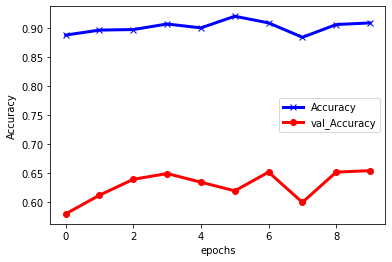

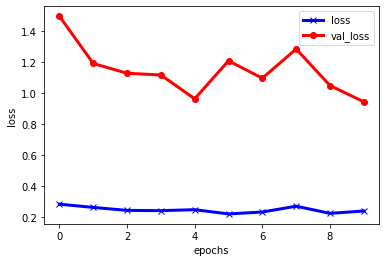

In [121]:
plot_graphs(history,'Accuracy')
plot_graphs(history,'loss')

In [122]:
import os

In [123]:
test_filenames = os.listdir(r"/content/drive/MyDrive/test_BC")
test_df = pd.DataFrame({
    "Filename" : test_filenames
})

In [124]:
total_test = len(test_df)
print('Total Number of images:',total_test)

Total Number of images: 43


In [125]:
test1_datagen = ImageDataGenerator(rescale=1/255)

In [126]:
test1_generator = test1_datagen.flow_from_dataframe(test_df,r"/content/drive/MyDrive/test_BC",
                                                    x_col='Filename',
                                                    class_mode=None,
                                                    target_size=(32,32),
                                                    batch_size=10)

Found 43 validated image filenames.


In [128]:
batch_size=10

In [130]:
predict = model.predict(test1_generator,steps=np.ceil(total_test/batch_size
                        ))
print("Number of predicted images:", len(predict), "\n")
print(predict)

Number of predicted images: 43 

[[0.92539024]
 [0.6351021 ]
 [0.8549324 ]
 [0.0998857 ]
 [0.8256216 ]
 [0.1176706 ]
 [0.5157929 ]
 [0.09742388]
 [0.03442535]
 [0.05085191]
 [0.45539802]
 [0.03381088]
 [0.29346448]
 [0.05081034]
 [0.28580981]
 [0.8216797 ]
 [0.8447989 ]
 [0.03520095]
 [0.6771925 ]
 [0.3086623 ]
 [0.04051867]
 [0.64898705]
 [0.03812647]
 [0.03406304]
 [0.04056397]
 [0.03935954]
 [0.04111332]
 [0.29505864]
 [0.02829906]
 [0.0380429 ]
 [0.03505579]
 [0.03023186]
 [0.03212193]
 [0.03597572]
 [0.04380688]
 [0.2858296 ]
 [0.08703485]
 [0.27506208]
 [0.84527874]
 [0.04752484]
 [0.1626553 ]
 [0.34878165]
 [0.04884639]]


In [148]:
test_df['category']=np.argmax(predict,axis=1)
print(test_df['category'][0:10])

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: category, dtype: int64


In [149]:
from tensorflow.keras.utils import load_img